In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv("aapl_stock1.csv")
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511
1,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840
2,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395
3,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442
4,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

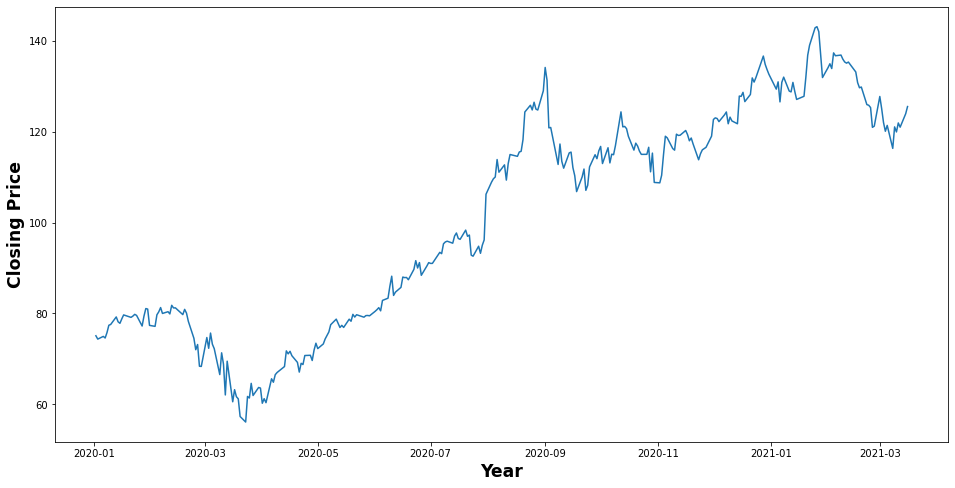

In [11]:
df["Date"]=pd.to_datetime(df.Date, format = "%Y-%m-%d")
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')
plt.xlabel("Year", fontsize='xx-large', fontweight='bold')
plt.ylabel("Closing Price", fontsize='xx-large', fontweight='bold')
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [15]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]
new_dataset.head()
new_dataset.columns

Index(['Date', 'Close'], dtype='object')

In [16]:
new_dataset = new_dataset.set_index(['Date'])
#new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:200,:]
valid_data=final_dataset[200:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [17]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

140/140 - 4s - loss: 0.0177


In [18]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [19]:
lstm_model.save("saved_model.h5")

<ipython-input-23-b13bbf2eb3c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


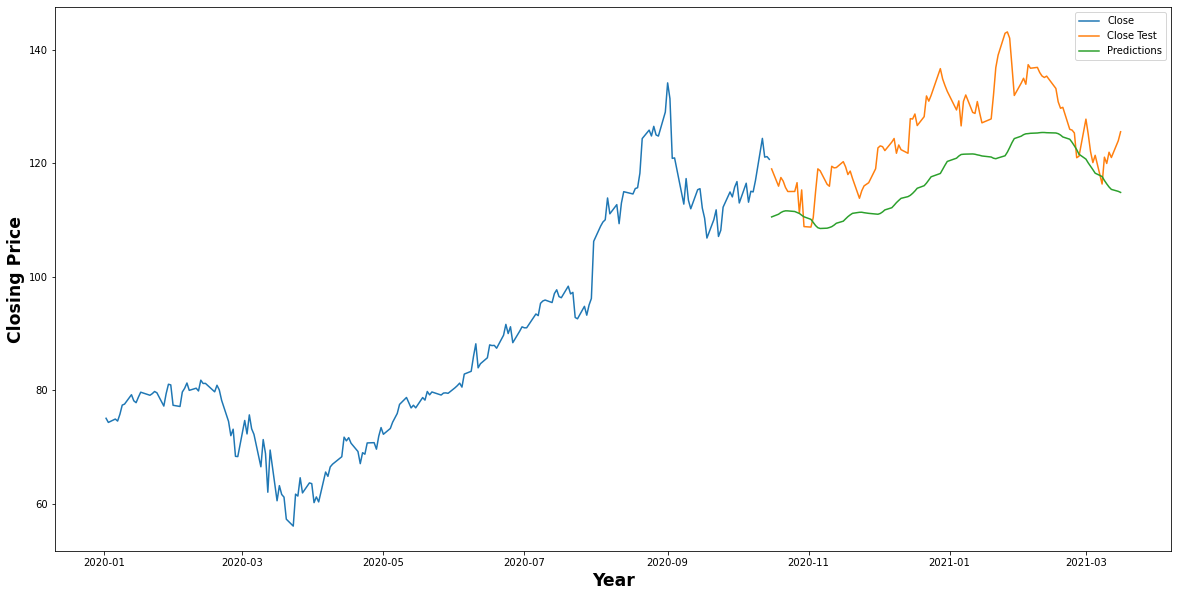

In [23]:
train_data=new_dataset[:200]
valid_data=new_dataset[200:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])
plt.xlabel("Year", fontsize='xx-large', fontweight='bold')
plt.ylabel("Closing Price", fontsize='xx-large', fontweight='bold')
plt.legend(['Close', 'Close Test', 'Predictions'])
plt.savefig('appl_stock.png')
plt.show()